In [66]:
!pip install keras
!pip install tensorflow
!pip install wordcloud
!pip install spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 2.0 MB/s eta 0:00:07
     - -------------------------------------- 0.4/12.8 MB 5.5 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/12.8 MB 8.7 MB/s eta 0:00:02
     ----- ---------------------------------- 1.7/12.8 MB 9.9 MB/s eta 0:00:02
     ------- -------------------------------- 2.2/12.8 MB 10.2 MB/s eta 0:00:02
     -------- ------------------------------- 2.7/12.8 MB 10.1 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 9.9 MB/s eta 0:00:01
     ---------- ----------------------------- 3.5/12.8 MB 9.7 MB/s eta 0:00:01
     ------------ --------------------------- 4.0/12.8 MB 10.2 MB/s eta 0:00:01
     ------------- -------------------------- 4.5/12.8 MB 10.2 MB/s eta 0:00:01
     --------------- ------------------------ 4.9/12.8 MB 10.0 MB/s eta 0:00:01
     ---------------- ----------------------- 5.4/12.8

In [67]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix,precision_score
from scipy.sparse import hstack,csr_matrix
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Input
from sklearn import preprocessing
from tensorflow.keras.models import Model
import scipy.sparse as sp
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import learning_curve,cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [68]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus M16\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\Asus
[nltk_data]     M16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus M16\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [69]:
df = pd.read_csv('fake_job_postings.csv')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [71]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [72]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

In [73]:
print(len(categorical))
print(categorical)

13
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [74]:
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [75]:
df[numerical].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
df.shape

(17880, 18)

In [77]:
fake=df[df['fraudulent']==1]
fake.shape

(866, 18)

In [78]:
real=df[df['fraudulent']==0]
real.shape

(17014, 18)

<Axes: >

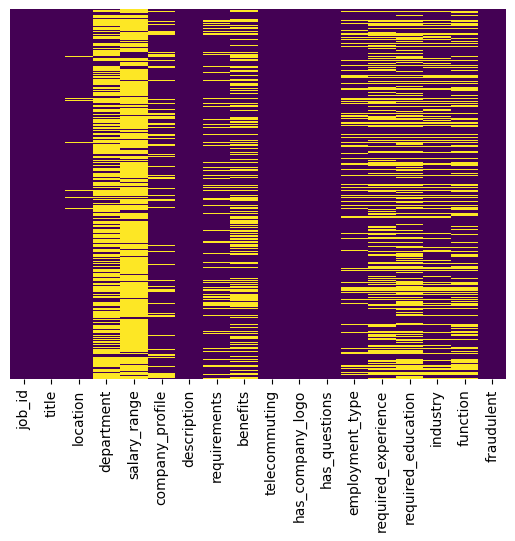

In [79]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [80]:
print(df.columns)

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


In [81]:
def code(string):
    if isinstance(string, str):  # Check if the value is a string
        return string.split(",")[0] #returns first part of string (US, NZ etc)
    else:
        return string
    
df['location']=df['location'].apply(code)

Text(0, 0.5, 'No. of Jobs')

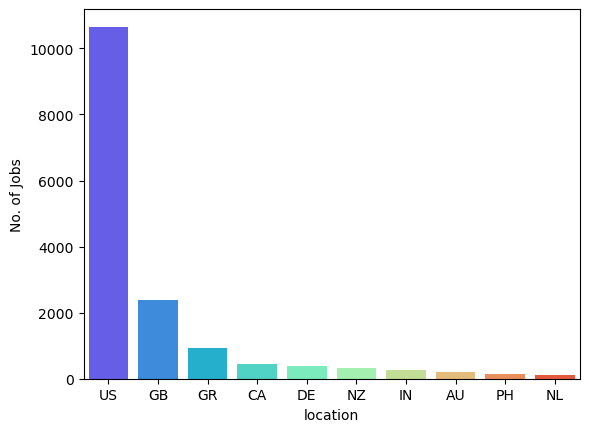

In [82]:
country = df['location'].value_counts().nlargest(10).index.tolist()
ax=sns.countplot(data=df, x='location', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [83]:
df.fillna(' ',inplace=True) #change NaN numeric data type to string

In [84]:
df = pd.concat([fake, real], ignore_index=True)


In [85]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
1,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
2,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
3,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
4,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


In [86]:
df.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
1,1,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
2,2,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
3,3,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
4,4,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [87]:
df['combined_text'] = df[['title', 'location', 'salary_range', 'company_profile', 'description', 'requirements', 
                          'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 
                          'function', 'department']].apply(lambda x: ' '.join(str(i) for i in x if pd.notnull(i)), axis=1)
# str(i) is used to convert each element i to a string.
# pd.notnull(i) is used to check if i is not null (NaN), and only non-null values are considered for joining.
# The join() function concatenates all the string representations of the elements, separated by a space (' ').

df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department'], inplace=True)

In [88]:
df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,combined_text
0,99,0,1,1,1,"IC&E Technician US, , Stocton, CA 95000-115000..."
1,145,0,0,0,1,Forward Cap. The group has raised a fund for t...
2,174,0,1,1,1,Technician Instrument & Controls US Edison In...
3,181,0,0,0,1,"Sales Executive PK, SD, Karachi Sales Executiv..."
4,216,0,1,1,1,"IC&E Technician Mt Poso US, CA, Bakersfield, C..."


In [89]:
fake=df[df['fraudulent']==1]['combined_text']
real=df[df['fraudulent']==0]['combined_text']

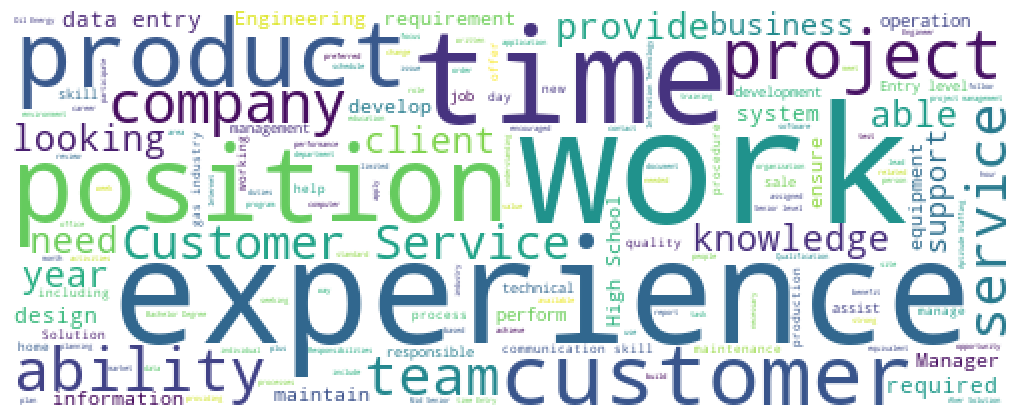

In [90]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(fake))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

common words that apppear in fake jobs: data entry, gas industry, entry level, Bachelor degree, customer service, high schoool

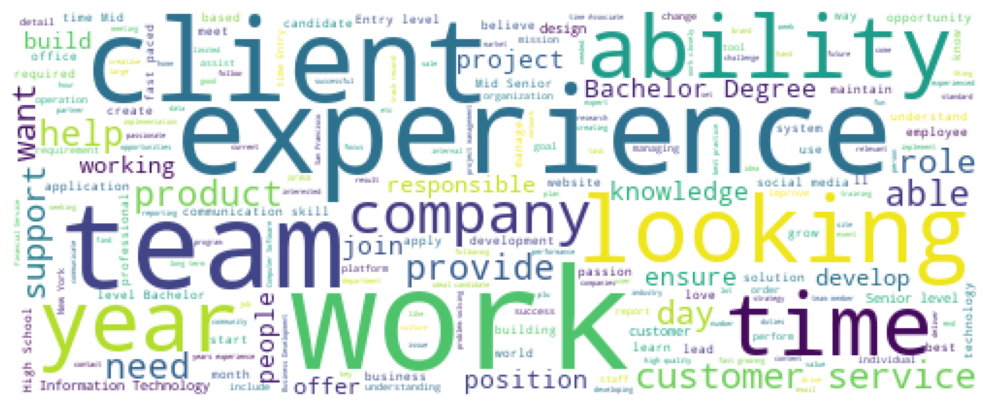

In [91]:
wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(real))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

Data Cleaning

In [92]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'<.*?>', '', text) #remove any HTML tags
    text = re.sub(r'http\S+', '', text) #Removing URLs
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) #Removing Non-Alphanumeric Characters
    tokens = nltk.word_tokenize(text) 
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

text.lower(): Converts the text to lowercase to ensure consistency in capitalization.

re.sub(r'<.*?>', '', text): Removes HTML tags using a regular expression. This pattern matches any substring starting with < and ending with >.

re.sub(r'http\S+', '', text): Removes URLs (web links) using a regular expression. This pattern matches any substring starting with http or https followed by non-whitespace characters (\S+), effectively removing URLs from the text.

re.sub(r'[^a-zA-Z0-9]', ' ', text): Replaces any characters that are not letters or digits with a space. This pattern matches any character that is not in the range of a-z, A-Z, or 0-9.

nltk.word_tokenize(text): Tokenizes the text into individual words using the NLTK library's word_tokenize function.

set(nltk.corpus.stopwords.words('english')): Retrieves a set of English stopwords from NLTK. Stopwords are common words like "the", "is", "are", etc., that often do not carry significant meaning and are removed from the text.

[word for word in tokens if word not in stop_words]: Removes stopwords from the tokenized text, keeping only words that are not in the set of stopwords.

' '.join(tokens): Joins the list of cleaned tokens back into a single string, separated by spaces.

return cleaned_text: Returns the cleaned text.

In [93]:
df['combined_text']=df['combined_text'].apply(clean_text)

In [94]:
df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,combined_text
0,99,0,1,1,1,ic e technician us stocton ca 95000 115000 sta...
1,145,0,0,0,1,forward cap group raised fund purchase homes s...
2,174,0,1,1,1,technician instrument controls us edison inter...
3,181,0,0,0,1,sales executive pk sd karachi sales executive ...
4,216,0,1,1,1,ic e technician mt poso us ca bakersfield ca m...


# spaCy to process text

Data Normalization

spaCy is an open-source library for advanced natural language processing (NLP) tasks in Python. It's designed to be fast, efficient, and production-ready, making it a popular choice for processing large volumes of text data. 

Tokenization: spaCy breaks text into tokens, which can be words, punctuation marks, or other meaningful units. Unlike simple string splitting, spaCy's tokenization takes into account complex cases like contractions, hyphenated words, and punctuation rules.

Part-of-speech (POS) Tagging: After tokenization, spaCy can assign part-of-speech tags to each token in the text. This involves labeling each word with its grammatical category, such as noun, verb, adjective, etc. POS tagging is crucial for many NLP tasks, including syntactic analysis, information extraction, and text generation.

Dependency Parsing: spaCy can analyze the syntactic structure of sentences by performing dependency parsing. This involves identifying the relationships between words in a sentence and representing them as a dependency tree. Each word is assigned a grammatical role (e.g., subject, object) and linked to its head word.

Named Entity Recognition (NER): NER is the task of identifying and classifying named entities in text, such as persons, organizations, locations, dates, and more. spaCy's NER component can automatically detect and categorize entities in text, providing valuable information for tasks like entity extraction, information retrieval, and document summarization.

Lemmatization: Lemmatization is the process of reducing words to their base or dictionary form (lemmas). For example, the lemma of "running" is "run", and the lemma of "better" is "good". spaCy's lemmatization functionality helps normalize text by converting inflected or derived forms of words to their canonical form.

Word Vectors: spaCy provides pre-trained word embeddings (word vectors) for over a million words in multiple languages. These word vectors capture semantic similarities between words, allowing models to understand relationships and context in text data. spaCy's word vectors are often used for tasks like similarity detection, recommendation systems, and sentiment analysis.

Custom Pipelines and Components: spaCy allows users to create custom NLP pipelines by combining and configuring various processing components. This flexibility enables developers to tailor spaCy's functionality to specific use cases and integrate it seamlessly into their applications.

Model Efficiency: One of spaCy's main advantages is its efficiency and scalability. It's optimized for speed and memory usage, making it suitable for processing large datasets and real-time applications. Additionally, spaCy's models are available in multiple sizes, allowing users to choose the trade-off between accuracy and computational resources.

Overall, spaCy is a comprehensive and versatile library that provides a wide range of tools and capabilities for NLP tasks, from basic text processing to advanced linguistic analysis and machine learning. Its user-friendly API, performance, and extensive documentation make it a popular choice for researchers, developers, and data scientists working in natural language processing and related fields.

Using spaCy's English language model (en_core_web_sm) for text preprocessing. The function called normalize_text tokenizes the input text, lemmatizes each token, and then returns the normalized text.


In [95]:
nlp = spacy.load("en_core_web_sm") #English language model provided by spaCy.

def normalize_text(text):
    # Tokenize the text and apply lemmatization
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

nlp(text): This line processes the input text using the spaCy pipeline. It tokenizes the text, performs part-of-speech tagging, dependency parsing, named entity recognition, and other linguistic annotations.

[token.lemma_ for token in doc]: This line extracts the lemmatized form of each token in the processed text (doc). The lemmatized form represents the base or dictionary form of a word. For example, the lemma of "running" is "run", and the lemma of "better" is "good". The list comprehension iterates over each token in doc, accesses its lemma_ attribute, and stores the lemmatized words in the normalized_words list.

' '.join(normalized_words): This line joins the lemmatized words back into a single string, separating them by spaces. This reconstructed string represents the normalized version of the input text, where each word is transformed into its base form.

In [96]:
# Define the index of the sentence you want to normalize
index_of_sentence = 0  # Replace 0 with the index of the sentence you want to normalize

# Access the specific sentence from the DataFrame
sentence_to_normalize = df.loc[index_of_sentence, 'combined_text']

# Apply the normalize_text function to the sentence
normalized_sentence = normalize_text(sentence_to_normalize)

# Update the sentence in the DataFrame with the normalized version
df.at[index_of_sentence, 'combined_text'] = normalized_sentence


df['combined_text']=df['combined_text'].apply(normalize_text)

In [97]:
# Define the batch size
batch_size = 500  # Increased batch size

# Calculate the number of batches
num_batches = np.ceil(len(df) / batch_size).astype(int)

# Define a function to process each batch
def process_batch(batch):
    return batch['combined_text'].apply(normalize_text)

# Apply the function to each batch
processed_batches = [process_batch(df.iloc[i*batch_size:(i+1)*batch_size]) for i in range(num_batches)]

# Concatenate the results back together
df['combined_text_normalized'] = pd.concat(processed_batches)

# Feature extraction

Preprocess the text data by applying Part-of-Speech tagging and CountVectorizer. It generates additional features based on grammatical structures and combines them with original text features. Finally, it saves the vectorizer for consistent preprocessing.

In [100]:
# Target Selection
x_sample = df['combined_text']  # Assuming 'combined_text' is the column containing text data
y_sample = df['fraudulent']

# Tokenize and tag each text with its part of speech
pos_tags = x_sample.apply(lambda x: ' '.join(tag[1] for tag in nltk.pos_tag(word_tokenize(x))))

# Create a new column 'pos_features' to store the part-of-speech tags
df['pos_features'] = pos_tags

# Initialize a CountVectorizer object
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Vectorize the 'combined_text' column
text_matrix_train = vectorizer.fit_transform(x_sample)

# Vectorize the 'pos_features' column
pos_matrix_train = vectorizer.transform(df['pos_features'])

# Horizontally stack (concatenate) the text matrix and the POS matrix
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

# Save the CountVectorizer object to a file
with open('countvectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


POS: Part-of-speech tagging is an algorithm/natural language processing (NLP) technique.
It labels each word in a text corpus with its corresponding part of speech category, such as noun, verb, adjective, adverb, pronoun, preposition, conjunction, interjection, etc.

The process involves analyzing the linguistic context of each word in a sentence to determine its grammatical category and assigning the appropriate tag accordingly.

Tokenization: The text data is split into individual words or tokens. This step usually involves removing punctuation and splitting the text into words based on whitespace or other delimiters.

Counting: For each document, a count is made of how many times each token appears. This results in a matrix where each row corresponds to a document and each column corresponds to a unique token. The matrix is typically sparse because most tokens will not appear in most documents.

Vectorization: The counts are then transformed into numerical feature vectors. E.g. Document 1: "The cat sat on the mat." the is assigned the value 2 in the matrix as it appears twice.

In [104]:
df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,combined_text,combined_text_normalized,pos_features
0,99,0,1,1,1,ic e technician us stocton ca 95000 115000 sta...,ic e technician us stocton ca 95000 115000 sta...,NN NN JJ PRP VBP MD CD CD NN NN VBG VB JJ NN V...
1,145,0,0,0,1,forward cap group raised fund purchase homes s...,forward cap group raise fund purchase home sou...,RB NN NN VBD NN NN NNS JJ NN NN NN VB NNS VB N...
2,174,0,1,1,1,technician instrument controls us edison inter...,technician instrument control us edison intern...,JJ NN NNS PRP VBP JJ JJ NNS VBD NN NN VBG NN V...
3,181,0,0,0,1,sales executive pk sd karachi sales executive ...,sale executive pk sd karachi sale executive sa...,NNS NN NN VBD JJ NNS NN NNS JJ NNS JJ NNS NNS
4,216,0,1,1,1,ic e technician mt poso us ca bakersfield ca m...,ic e technician mt poso we can bakersfield ca ...,NN NN JJ NN NN PRP MD VB MD VB VB CD CD NN NN ...


In [122]:
# Target Selection
x_sample1 = df['combined_text']
y_sample1 = df['fraudulent']

#split
X_train, X_test, y_train, y_test = train_test_split(
    x_sample1, y_sample1,
    test_size=0.3,
    stratify=y_sample1,
    random_state=42
)

In [123]:
# Target Selection
x_sample2 = df['combined_text_normalized']
y_sample2 = df['fraudulent']

#split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    x_sample2, y_sample2,
    test_size=0.3,
    stratify=y_sample2,
    random_state=42
)

# Target Selection
x_sample3 = df['pos_features']
y_sample3 = df['fraudulent']

#split
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    x_sample3, y_sample3,
    test_size=0.3,
    stratify=y_sample3,
    random_state=42
)


In [124]:
# Apply vectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf.fit(X_train)
X_train =  tfidf.transform(X_train)
X_test= tfidf.transform(X_test)

# Apply vectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf.fit(X_train2)
X_train2 =  tfidf.transform(X_train2)
X_test2= tfidf.transform(X_test2)

# Apply vectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf.fit(X_train3)
X_train3 =  tfidf.transform(X_train3)
X_test3= tfidf.transform(X_test3)

In [125]:
df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,combined_text,combined_text_normalized,pos_features
0,99,0,1,1,1,ic e technician us stocton ca 95000 115000 sta...,ic e technician us stocton ca 95000 115000 sta...,NN NN JJ PRP VBP MD CD CD NN NN VBG VB JJ NN V...
1,145,0,0,0,1,forward cap group raised fund purchase homes s...,forward cap group raise fund purchase home sou...,RB NN NN VBD NN NN NNS JJ NN NN NN VB NNS VB N...
2,174,0,1,1,1,technician instrument controls us edison inter...,technician instrument control us edison intern...,JJ NN NNS PRP VBP JJ JJ NNS VBD NN NN VBG NN V...
3,181,0,0,0,1,sales executive pk sd karachi sales executive ...,sale executive pk sd karachi sale executive sa...,NNS NN NN VBD JJ NNS NN NNS JJ NNS JJ NNS NNS
4,216,0,1,1,1,ic e technician mt poso us ca bakersfield ca m...,ic e technician mt poso we can bakersfield ca ...,NN NN JJ NN NN PRP MD VB MD VB VB CD CD NN NN ...


Loss of Information: POS tagging might result in loss of information compared to using the raw text data. During POS tagging, the focus is on identifying the grammatical components of the text, which may not capture all the relevant semantic information needed for the classification task.

While spaCy was used for preprocessing, the following machine learning models are used for classification.
spaCy tokenizes it, lemmatizes the tokens, and extracts linguistic features like part-of-speech tags. These preprocessed features can then be used as input to train machine learning models for classifying real and fake job postings.

# Models

## Logistic Regression

In [114]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### Predict on train set

In [115]:
y_train_logreg_pred = logreg.predict(X_train)

<Axes: >

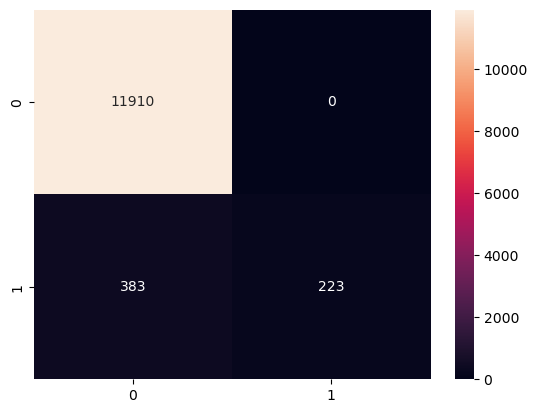

In [126]:
import seaborn as sb
from sklearn.metrics import confusion_matrix

sb.heatmap(confusion_matrix(y_train, y_train_logreg_pred), annot = True, fmt="d")

In [127]:
from sklearn.metrics import precision_score, recall_score, fbeta_score, roc_auc_score

# Evaluation of model's performance on train set
print("Logistic Regression Accuracy:", accuracy_score(y_train, y_train_logreg_pred))
print("Logistic Regression Recall:", recall_score(y_train, y_train_logreg_pred))
print("Logistic Regression Precision:", precision_score(y_train, y_train_logreg_pred))
print("Logistic Regression F2 score:", fbeta_score(y_train, y_train_logreg_pred, average='binary', beta=2))
print('Logistic Regression ROC AUC Score', roc_auc_score(y_train, y_train_logreg_pred))

Logistic Regression Accuracy: 0.9693991690635986
Logistic Regression Recall: 0.367986798679868
Logistic Regression Precision: 1.0
Logistic Regression F2 score: 0.421231582924065
Logistic Regression ROC AUC Score 0.683993399339934


In [150]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train2, y_train2)

y_train_logreg_pred2 = logreg.predict(X_train2)

# Evaluation of model's performance on train set
print("Logistic Regression Accuracy:", accuracy_score(y_train2, y_train_logreg_pred2))
print("Logistic Regression Recall:", recall_score(y_train2, y_train_logreg_pred2))
print("Logistic Regression Precision:", precision_score(y_train2, y_train_logreg_pred2))
print("Logistic Regression F2 score:", fbeta_score(y_train2, y_train_logreg_pred2, average='binary', beta=2))
print('Logistic Regression ROC AUC Score', roc_auc_score(y_train2, y_train_logreg_pred2))

Logistic Regression Accuracy: 0.9693991690635986
Logistic Regression Recall: 0.367986798679868
Logistic Regression Precision: 1.0
Logistic Regression F2 score: 0.421231582924065
Logistic Regression ROC AUC Score 0.683993399339934


In [151]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train3, y_train3)

y_train_logreg_pred3 = logreg.predict(X_train3)

# Evaluation of model's performance on train set
print("Logistic Regression Accuracy:", accuracy_score(y_train3, y_train_logreg_pred3))
print("Logistic Regression Recall:", recall_score(y_train3, y_train_logreg_pred3))
print("Logistic Regression Precision:", precision_score(y_train3, y_train_logreg_pred3))
print("Logistic Regression F2 score:", fbeta_score(y_train3, y_train_logreg_pred3, average='binary', beta=2))
print('Logistic Regression ROC AUC Score', roc_auc_score(y_train3, y_train_logreg_pred3))

Logistic Regression Accuracy: 0.9516618728028124
Logistic Regression Recall: 0.0033003300330033004
Logistic Regression Precision: 0.6666666666666666
Logistic Regression F2 score: 0.004120313143798928
Logistic Regression ROC AUC Score 0.501608183488374


## Support Vector Machine

In [137]:
svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)

SVC(class_weight='balanced')

In [138]:
y_svm_train_balanced_pred = svm.predict(X_train)

In [139]:
# Evaluation of model's performance on train set
print("SVM Accuracy:", accuracy_score(y_train, y_svm_train_balanced_pred))
print("SVM Recall:", recall_score(y_train, y_svm_train_balanced_pred))
print("SVM Precision:", precision_score(y_train, y_svm_train_balanced_pred))
print("SVM F2 score:", fbeta_score(y_train, y_svm_train_balanced_pred, average='binary', beta=2))
print('SVM ROC AUC Score', roc_auc_score(y_train, y_svm_train_balanced_pred))

SVM Accuracy: 0.9998402045381911
SVM Recall: 1.0
SVM Precision: 0.9967105263157895
SVM F2 score: 0.99934036939314
SVM ROC AUC Score 0.9999160369437448


In [140]:
svm = SVC(class_weight='balanced')
svm.fit(X_train2, y_train2)

y_svm_train_balanced_pred2 = svm.predict(X_train2)

# Evaluation of model's performance on train set
print("SVM Accuracy:", accuracy_score(y_train2, y_svm_train_balanced_pred2))
print("SVM Recall:", recall_score(y_train2, y_svm_train_balanced_pred2))
print("SVM Precision:", precision_score(y_train2, y_svm_train_balanced_pred2))
print("SVM F2 score:", fbeta_score(y_train2, y_svm_train_balanced_pred2, average='binary', beta=2))
print('SVM ROC AUC Score', roc_auc_score(y_train2, y_svm_train_balanced_pred2))

SVM Accuracy: 0.9997603068072867
SVM Recall: 1.0
SVM Precision: 0.9950738916256158
SVM F2 score: 0.9990108803165184
SVM ROC AUC Score 0.9998740554156171


In [142]:
svm = SVC(class_weight='balanced')
svm.fit(X_train3, y_train3)

y_svm_train_balanced_pred3 = svm.predict(X_train3)

# Evaluation of model's performance on train set
print("SVM Accuracy:", accuracy_score(y_train3, y_svm_train_balanced_pred3))
print("SVM Recall:", recall_score(y_train3, y_svm_train_balanced_pred3))
print("SVM Precision:", precision_score(y_train3, y_svm_train_balanced_pred3))
print("SVM F2 score:", fbeta_score(y_train3, y_svm_train_balanced_pred3, average='binary', beta=2))
print('SVM ROC AUC Score', roc_auc_score(y_train3, y_svm_train_balanced_pred3))

SVM Accuracy: 0.8358900607222755
SVM Recall: 0.8547854785478548
SVM Precision: 0.20853462157809985
SVM F2 score: 0.5277098614506927
SVM ROC AUC Score 0.8448570549750191


## XGBoost Classifier

In [144]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [145]:
y_xgb_train_pred = xgb.predict(X_train)

<Axes: >

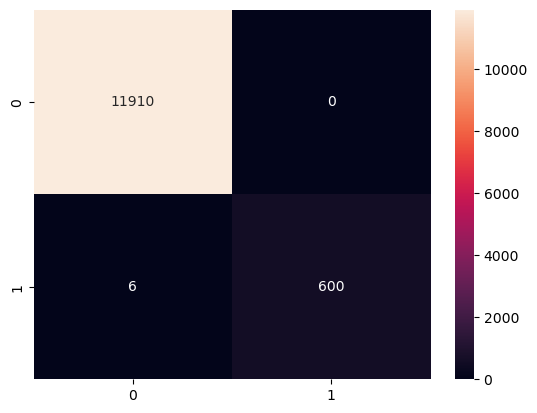

In [146]:
sb.heatmap(confusion_matrix(y_train, y_xgb_train_pred), annot = True, fmt="d")

In [147]:
# Evaluation of model's performance on train set
print("XGB Accuracy:", accuracy_score(y_train, y_xgb_train_pred))
print("XGB Recall:", recall_score(y_train, y_xgb_train_pred))
print("XGB Precision:", precision_score(y_train, y_xgb_train_pred))
print("XGB F2 score:", fbeta_score(y_train, y_xgb_train_pred, average='binary', beta=2))
print('XGB ROC AUC Score', roc_auc_score(y_train, y_xgb_train_pred))

XGB Accuracy: 0.9995206136145733
XGB Recall: 0.9900990099009901
XGB Precision: 1.0
XGB F2 score: 0.9920634920634921
XGB ROC AUC Score 0.995049504950495


XGB Accuracy: 0.9995206136145733
XGB Recall: 0.9900990099009901
XGB Precision: 1.0
XGB F2 score: 0.9920634920634921
XGB ROC AUC Score 0.995049504950495


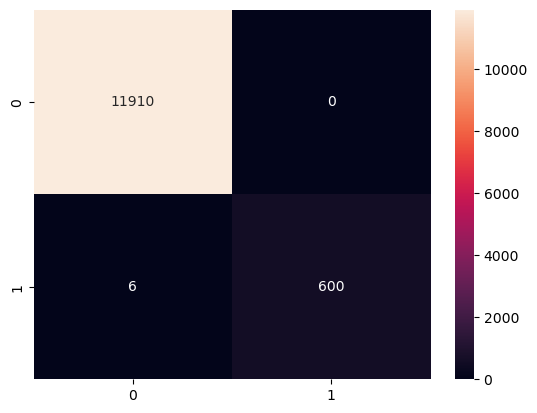

In [148]:
xgb = XGBClassifier()
xgb.fit(X_train2, y_train2)

y_xgb_train_pred2 = xgb.predict(X_train2)

sb.heatmap(confusion_matrix(y_train2, y_xgb_train_pred2), annot = True, fmt="d")

# Evaluation of model's performance on train set
print("XGB Accuracy:", accuracy_score(y_train2, y_xgb_train_pred2))
print("XGB Recall:", recall_score(y_train2, y_xgb_train_pred2))
print("XGB Precision:", precision_score(y_train2, y_xgb_train_pred2))
print("XGB F2 score:", fbeta_score(y_train2, y_xgb_train_pred2, average='binary', beta=2))
print('XGB ROC AUC Score', roc_auc_score(y_train2, y_xgb_train_pred2))

XGB Accuracy: 1.0
XGB Recall: 1.0
XGB Precision: 1.0
XGB F2 score: 1.0
XGB ROC AUC Score 1.0


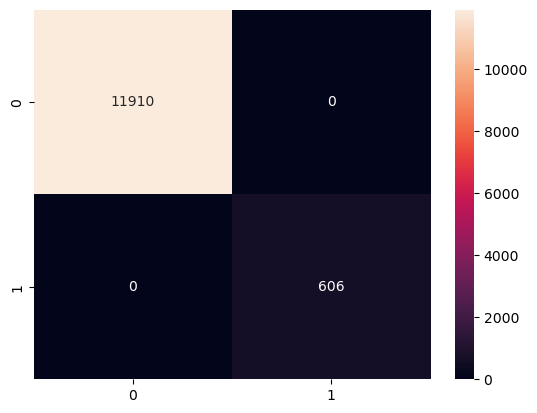

In [149]:
xgb = XGBClassifier()
xgb.fit(X_train3, y_train3)

y_xgb_train_pred3 = xgb.predict(X_train3)

sb.heatmap(confusion_matrix(y_train3, y_xgb_train_pred3), annot = True, fmt="d")

# Evaluation of model's performance on train set
print("XGB Accuracy:", accuracy_score(y_train3, y_xgb_train_pred3))
print("XGB Recall:", recall_score(y_train3, y_xgb_train_pred3))
print("XGB Precision:", precision_score(y_train3, y_xgb_train_pred3))
print("XGB F2 score:", fbeta_score(y_train3, y_xgb_train_pred3, average='binary', beta=2))
print('XGB ROC AUC Score', roc_auc_score(y_train3, y_xgb_train_pred3))